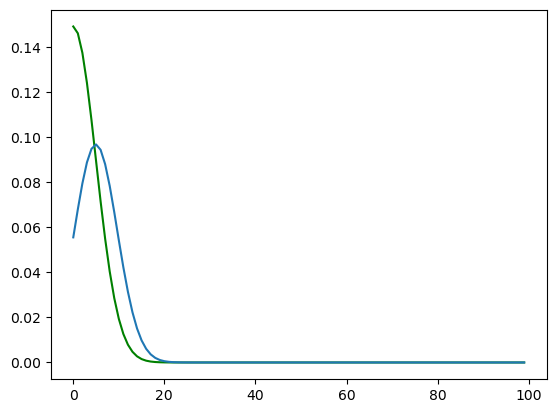

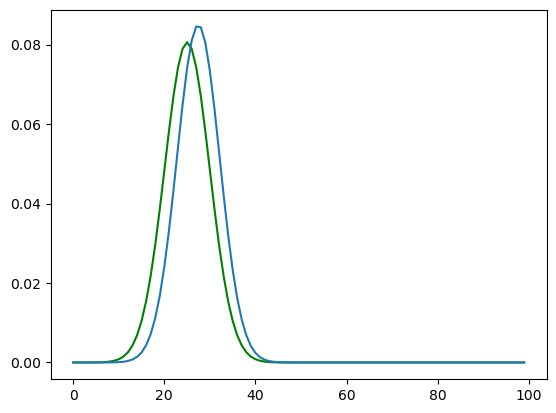

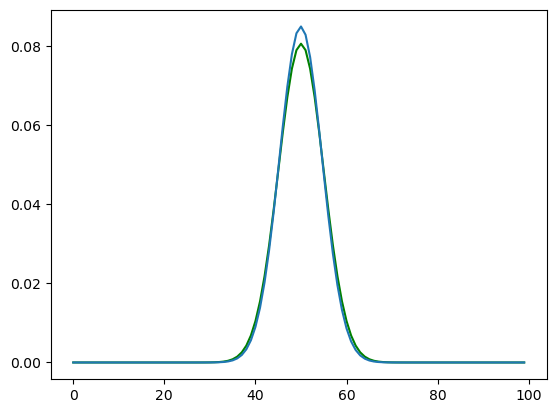

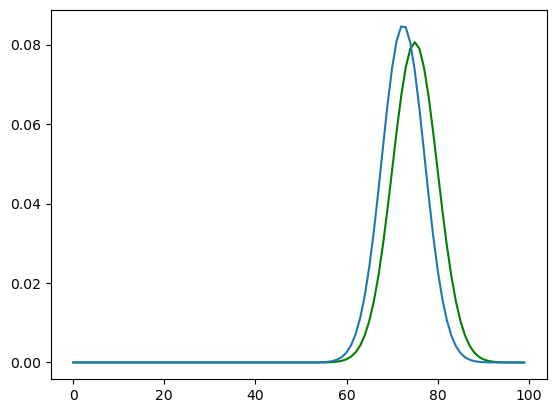

In [15]:
import numpy as np
import scipy.stats as sci
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
sys.path.insert(0, '../Scripts/')



driftbounds=.3
dailydrift=.1
numberofbins=100
x=np.linspace(-1,1,numberofbins)

blur=np.zeros((numberofbins,numberofbins)) # [which bin profile it's for, what the distribution is between that bin and all other bins, 2]
blur2=np.zeros((numberofbins,numberofbins)) # [which bin profile it's for, what the distribution is between that bin and all other bins, 2]




for b in range(numberofbins):
    blur[b,:]=sci.norm.pdf(x,x[b],dailydrift)
    blur[b,:]/=np.sum(blur[b,:])
    blur2[b,:]=blur[b,:]*sci.norm.pdf(x,0,driftbounds)
    blur2[b,:]/=np.sum(blur2[b,:])

for i in range(0,4):
    plt.plot(blur[i*25,:], 'g')
    plt.plot(blur2[i*25,:])
    plt.show()

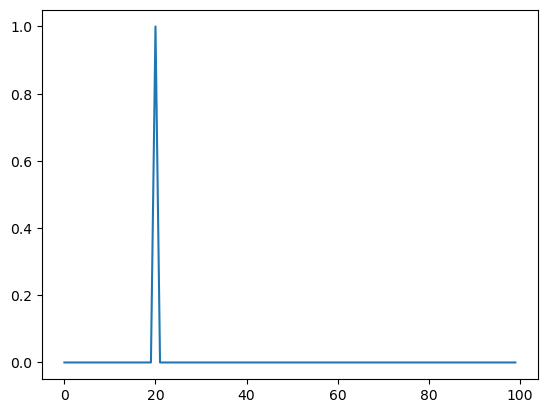

1


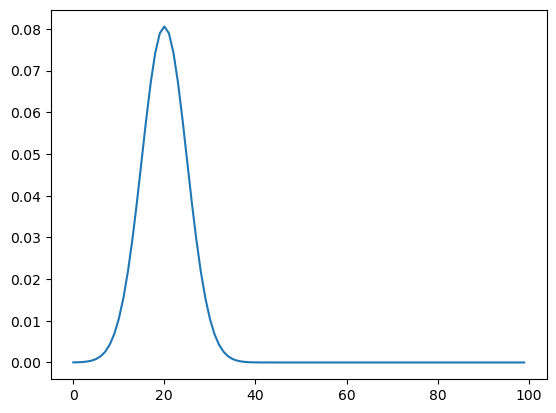

2


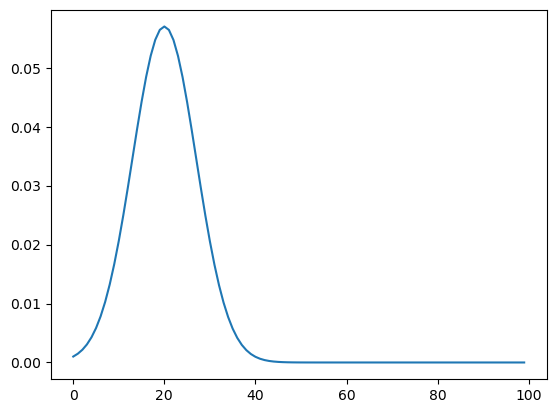

3


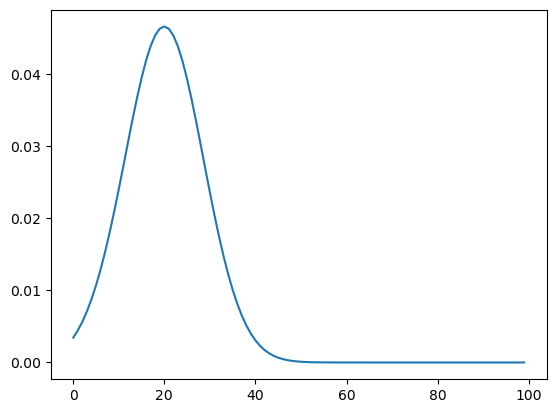

4


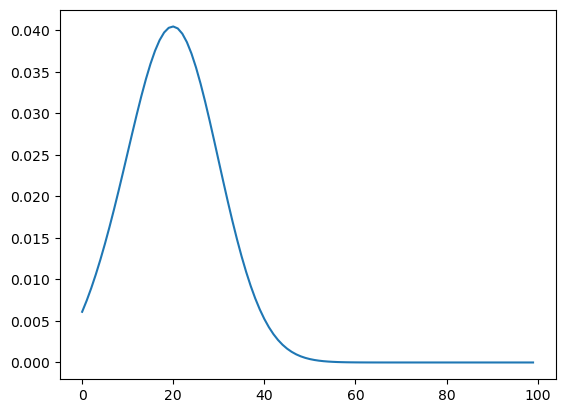

5


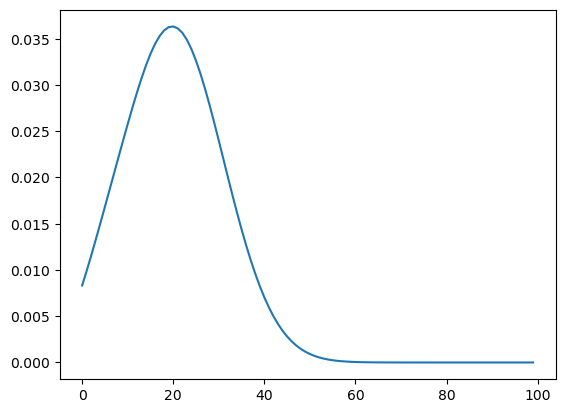

6


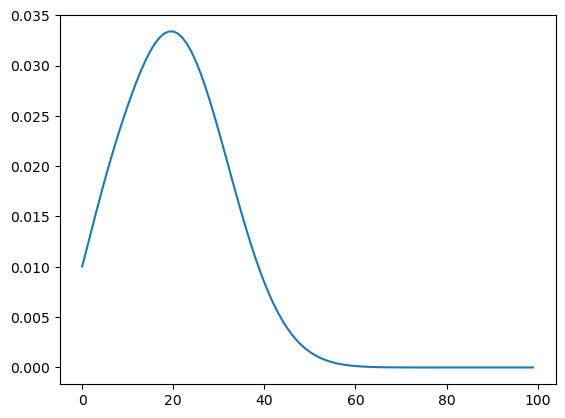

7


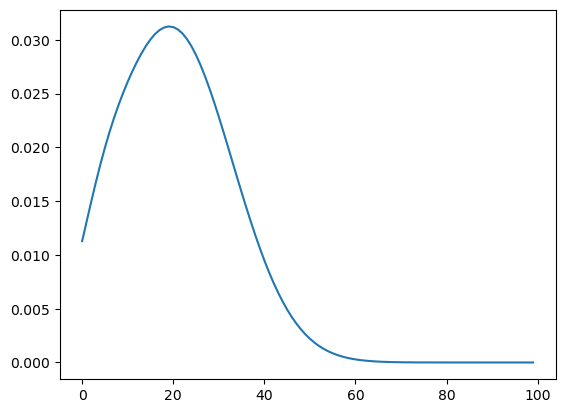

8


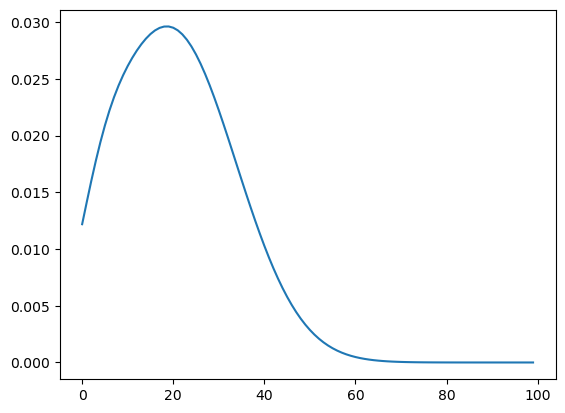

9


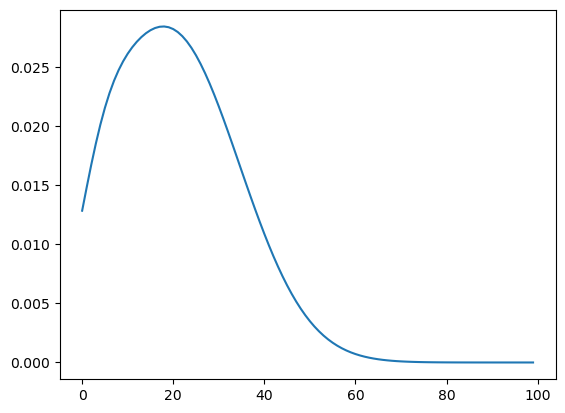

In [16]:
start=np.zeros(numberofbins)
# start[50]=1
# plt.plot(start)
numdays=10
days=np.zeros([numberofbins,numdays])
days[20,0]=1

plt.plot(days[:,0])
plt.show()

for j in range(1, numdays):
    for i in range(numberofbins):
        days[:,j]+=days[i, j-1]*blur[i,:]
    
    plt.plot(days[:,j])
    print(j)
    plt.show()



In [17]:
np.random.rand()

0.2511816338323095

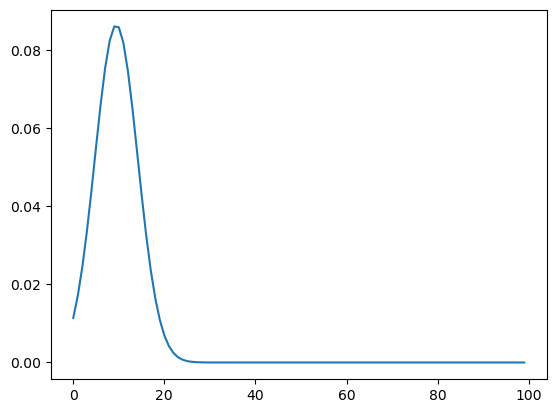

9.819999999999995


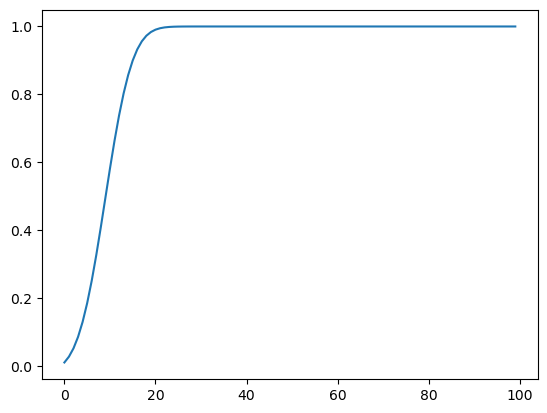

In [18]:
import scipy
plt.plot(blur2[5,:])
plt.show()
plt.plot(np.cumsum(blur2[5,:]))


def randomnewbin(blur, currentbin):
    cdf=np.cumsum(blur[currentbin,:])
    # binx=np.linspace(0,100,100)
    return int(np.min(np.where(cdf>np.random.rand())))
# print(y)
avgint=0
for i in range(100):
    avgint+=randomnewbin(blur2, 5)/100
print(avgint)


In [19]:
import random

import simpledrift as sd

numsims=100
numdays=15

envi=sd.powerdrift(100,numdays,.2, .8, 1, power=1)
envi.shape[1]

15

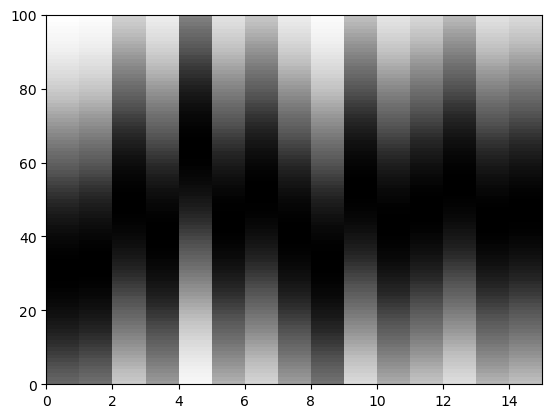

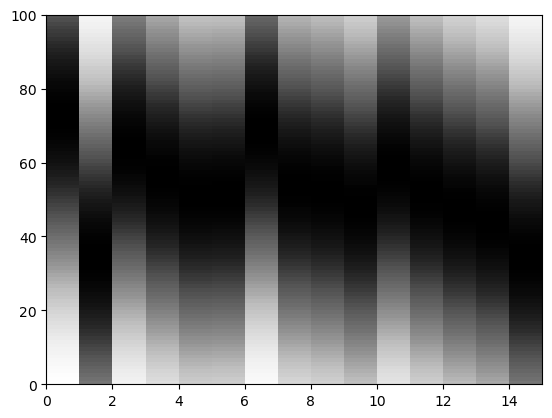

In [20]:
envi2=sd.powerdrift(100,numdays,.2, .8, 1, power=0)
plt.pcolormesh(envi, cmap='Greys')
plt.show()
plt.pcolormesh(envi2, cmap='Greys')
plt.show()


In [59]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

# plt.pcolormesh(envi)
# envi[:,11]

driftbounds=.2
dailydrift=.1
numberofbins=100
numbins=100
prefvariability=.2
prefmean=50

def driftsim(envi, driftbounds=.2, dailydrift=.1, numberofbins=100, prefvariability=.2, prefmean=50, numsims=100):
    x=np.linspace(-1,1,numberofbins)


    blur=np.zeros((numberofbins,numberofbins)) # [which bin profile it's for, what the distribution is between that bin and all other bins, 2]
    blur2=np.zeros((numberofbins,numberofbins)) # [which bin profile it's for, what the distribution is between that bin and all other bins, 2]

    if dailydrift==0:
        for b in range(numberofbins):
            blur2[b,b]=1

    else:
        for b in range(numberofbins):
            blur[b,:]=sci.norm.pdf(x,x[b],dailydrift)
            blur[b,:]/=np.sum(blur[b,:])
            blur2[b,:]=np.power(blur[b,:]*sci.norm.pdf(x,0,driftbounds), .5)
            blur2[b,:]/=np.sum(blur2[b,:])

#         for i in range(0,4):
#             plt.plot(blur[i*25,:], 'g')
#             plt.plot(blur2[i*25,:])
#             plt.show()


    numdays=envi.shape[1]
    # startpref=int(np.round(np.random.normal(prefmean,prefvariability*numbins)))
    startpref=int(np.round(np.minimum(0, np.maximum(100, np.random.normal(prefmean,prefvariability*numberofbins)))))
    # print(startpref)

    allsims=np.zeros([numsims,numdays])
    colorpoints=np.zeros([numdays, numsims, 2])
#     colorpoints=np.zeros([numdays, 1, 2])




    survivalpercent=np.ones([numsims, numdays])
    # print(survivalpercent)
    for n in range(numsims):
        allsims[n,0]=int(np.minimum(99, np.maximum(0, np.round(np.random.normal(prefmean,prefvariability*numberofbins)))))
    #     print(allsims[n,0])
    
        for t in range(1,numdays):
    #         print(n,t)
            allsims[n,t]=randomnewbin(blur2, int(allsims[n,t-1]))
    #         print(n,t)
    #         print(n,t, allsims[n,t])
            survivalpercent[n,t]=envi[int(allsims[n,t]),t]*survivalpercent[n,t-1]
        colorpoints[:,n,0]=np.array([range(numdays)])
        colorpoints[:,n,1]=allsims[n,:]
#         colorpoints[:,n]=np.array([[np.arange(numdays)], allsims[n,:]]).T.reshape(-1, 1, 2)
#         colorpoints[:,n,1]=allsims[n,:]
    
#     colorpoints=colorpoints[:,-1,:].reshape(-1, 1, 2)
#     colorsegments= np.concatenate([colorpoints[:-1], colorpoints[1:]], axis=1)

    # survivalpercent=-np.log(survivalpercent)
    survivalmax=np.max(survivalpercent)
#     print(survivalmax)

    fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1)
    fig.set_figwidth(6)
    fig.set_figheight(9)
    fig.tight_layout()
    plt.subplots_adjust(hspace=.3)
    
    
    lines1=ax0.pcolormesh(envi, cmap='Greys')
    ax0.set_ylabel('Environment Selection on Preference')
    ax0.set_title('Environment')
    lines1=ax1.pcolormesh(envi, cmap='Greys')
    lines1=ax2.pcolormesh(envi, cmap='Greys')

    
    fig.colorbar(lines1,ax=ax0)


    
    endsurvival=survivalpercent[:,-1]
#     print(endsurvival)
    dodgeindex=np.arange(allsims.shape[1])+.5
    print(dodgeindex)
    for n in range(numsims):
        cmp=cm.get_cmap('cool')
        dodgeindex=np.arange(len(allsims[n,:]))+.5
        # print(dodgeindex)
        ax1.plot(dodgeindex, allsims[n,:], color=cmp(endsurvival[n]/survivalmax), alpha=1)
#         ax2.plot(allsims[n,:], color=cmp(endsurvival[n]/survivalmax), alpha=endsurvival[n]/survivalmax)
#         ax1.plot(allsims[n,:], alpha=.1)
#         ax2.plot(allsims[n,:], alpha=.1)
        

#     ax2
#     fig.colorbar(lines1,ax=ax1)
    ax1.set_ylabel('Preference')
    ax1.set_title('Odds of survival (final day)')


#     print(survivalpercent[,:].min())
    norm = plt.Normalize(0,1)
    
    for n in range(numsims):
        colorpointsn=colorpoints[:,n,:].reshape(-1, 1, 2)
        print(colorpointsn.shape)
        colorpointsn[:,:,0]=colorpointsn[:,:,0]+.5
        colorsegments= np.concatenate([colorpointsn[:-1], colorpointsn[1:]], axis=1)
        lc = LineCollection(colorsegments, cmap='cool', norm=norm)
    # Set the values used for colormapping
#     print(survivalpercent[-1,1:])
        lc.set_array(survivalpercent[n,1:])
        lc.set_linewidth(1)
#         lc.set_alpha(survivalpercent[n,1:])
        line = ax2.add_collection(lc)
    fig.colorbar(line, ax=ax2)
    fig.colorbar(line,ax=ax1)


    ax1.set_xlim(0,numdays)
    ax1.set_ylim(0,100)
    ax2.set_xlim(0,numdays)
    ax2.set_ylim(0,100)
    ax2.set_xlabel('day')
    ax2.set_ylabel('preference')
    ax2.set_title('Odds of Survival (by day)')


    ax3.hist(endsurvival)
    ax3.set_xlabel('Odds of Survival to final day')
    ax3.set_ylabel('Number of flies')
    plt.show()

    
    print('Mean survival rate:'+str(np.mean(survivalpercent)))
    return allsims,survivalpercent, fig


# allsims
# fig.colorbar(cmp, ax=ax)

 
 
 
 

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5]
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)


/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_32729/2249201931.py:97: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmp=cm.get_cmap('cool')


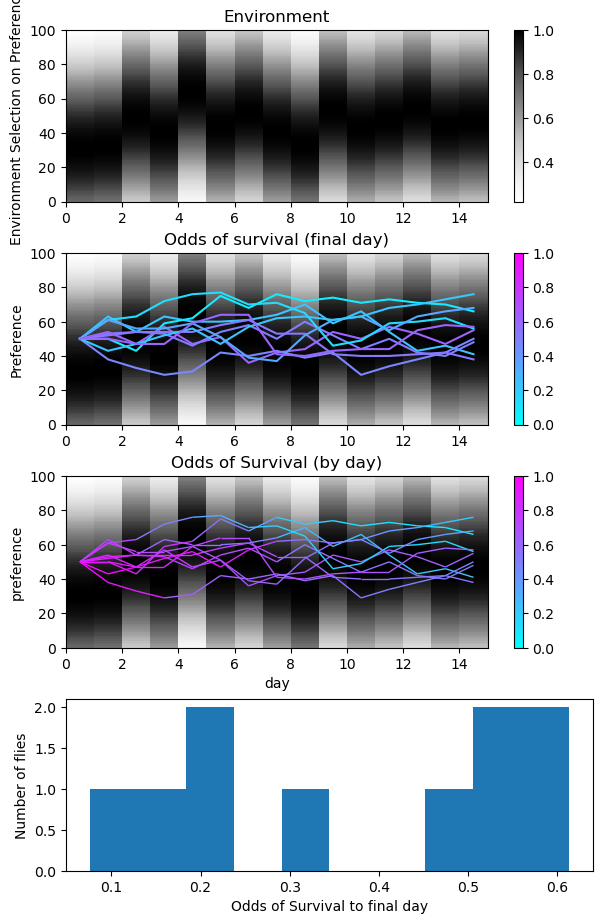

Mean survival rate:0.6085320828196426


In [60]:
[sims, survivalpercent, fig]=driftsim(envi, driftbounds=.2, dailydrift=.1, numberofbins=100, prefvariability=0, prefmean=50, numsims=10)


In [61]:
fig.savefig('F2A_driftsim.pdf')

In [32]:
[sims]

[array([[50., 48., 45., 40., 39., 49., 51., 48., 45., 44., 36., 24., 23.,
         16., 16.],
        [50., 43., 26., 34., 43., 59., 56., 59., 53., 70., 61., 56., 56.,
         54., 60.],
        [50., 42., 46., 49., 44., 46., 55., 51., 59., 54., 52., 54., 54.,
         48., 47.],
        [50., 50., 50., 52., 41., 53., 54., 56., 62., 69., 61., 56., 58.,
         44., 38.],
        [50., 56., 41., 47., 27., 32., 32., 32., 35., 35., 42., 52., 54.,
         57., 55.],
        [50., 47., 50., 54., 49., 51., 49., 41., 45., 28., 36., 37., 42.,
         50., 53.],
        [50., 46., 43., 52., 46., 35., 24., 18., 14., 27., 34., 37., 38.,
         38., 52.],
        [50., 55., 59., 66., 63., 58., 50., 58., 57., 42., 52., 50., 51.,
         47., 46.],
        [50., 49., 49., 43., 48., 48., 44., 44., 47., 38., 47., 48., 48.,
         51., 40.],
        [50., 47., 51., 52., 64., 62., 52., 53., 65., 59., 56., 49., 38.,
         28., 32.]])]

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_32729/3341030817.py:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmp=cm.get_cmap('cool')


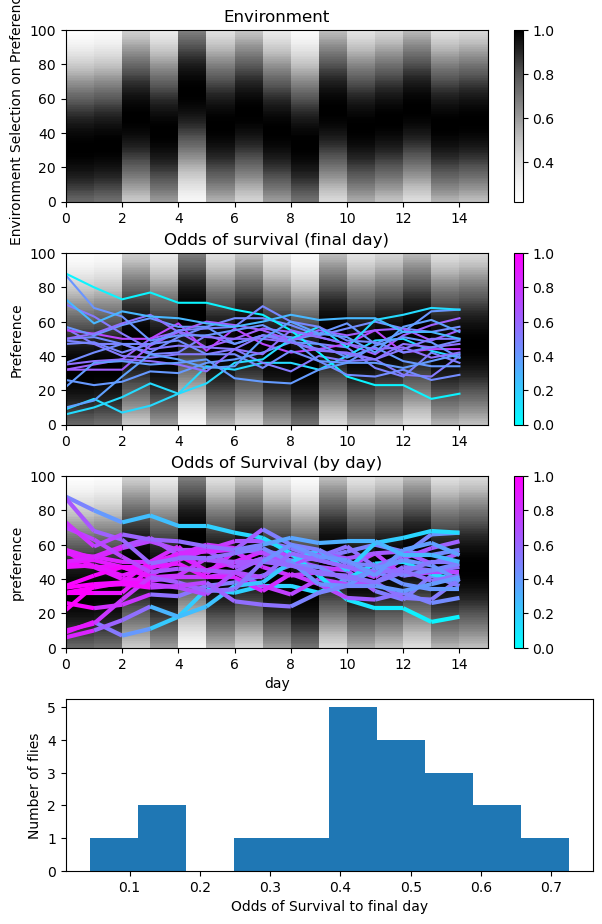

Mean survival rate:0.6267341452197851


In [23]:
[sims, survivalpercent]=driftsim(envi, driftbounds=.2, dailydrift=.1, numberofbins=100, prefvariability=.2, prefmean=50, numsims=20)


(20, 15)
(array([6]),)


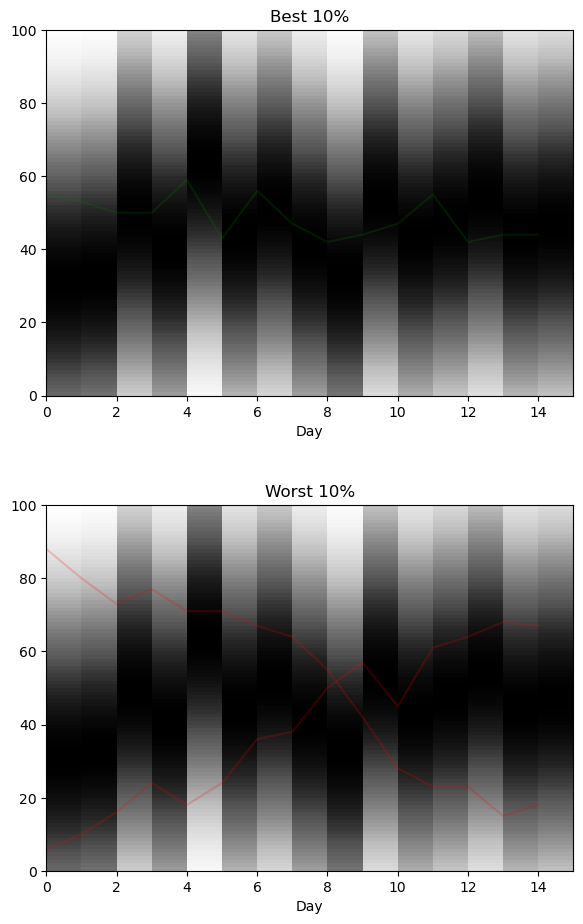

In [24]:
print(survivalpercent.shape)
numsims=int(survivalpercent.shape[0])

percentile=np.sort(survivalpercent[:,-1])[int(.9*numsims)]
top10=np.where(survivalpercent[:,-1]>percentile)
print(top10)
# survivalpercentile=np.where
# plt.plot(sorted)
# top10
toptraces=np.squeeze(sims[top10,:])
# print(x)

fig, (ax0, ax1) = plt.subplots(2, 1)
fig.set_figwidth(6)
fig.set_figheight(9)
fig.tight_layout()
plt.subplots_adjust(hspace=.3)

ax0.pcolormesh(envi, cmap='Greys')
ax0.plot(np.transpose(toptraces), 'g',alpha=.2)
ax0.set_xlabel('Day')
ax0.set_title('Best 10%')
# plt.show()

percentile=np.sort(survivalpercent[:,-1])[int(.1*numsims)]
bottom10=np.where(survivalpercent[:,-1]<percentile)
bottomtraces=np.squeeze(sims[bottom10,:])
# survivalpercentile=np.where
# plt.plot(sorted)
# top10
# x=np.squeeze(sims[top10,:])
ax1.pcolormesh(envi, cmap='Greys')
ax1.plot(np.transpose(bottomtraces), 'r', alpha=.2)
ax1.set_xlabel('Day')
ax1.set_title('Worst 10%')
plt.show()

# plt.plot(survivalpercent)

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_32729/3341030817.py:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmp=cm.get_cmap('cool')


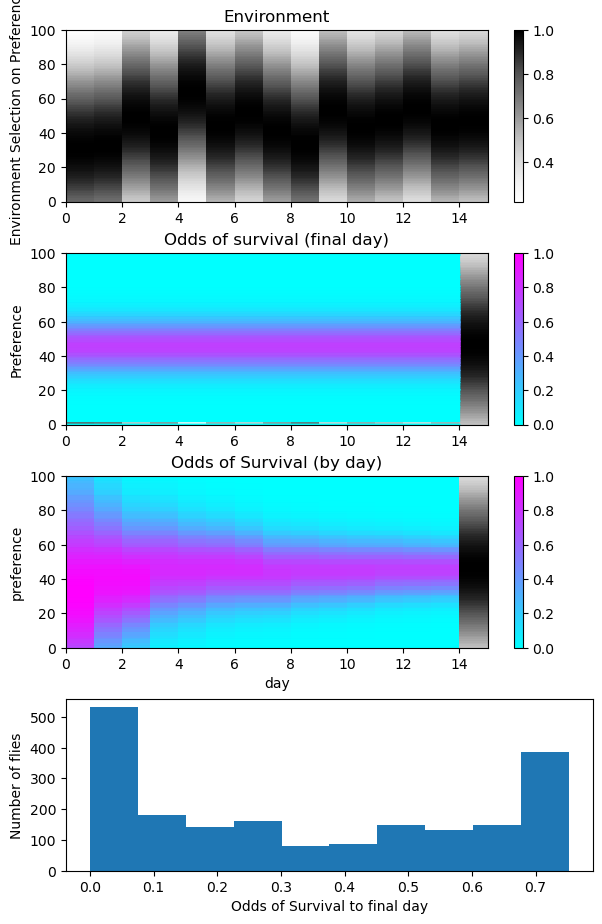

Mean survival rate:0.5371229139450443


In [25]:
[sims, survivalpercent]=driftsim(envi, driftbounds=.2, dailydrift=.001, numberofbins=100, prefvariability=.2, prefmean=50, numsims=2000)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5]
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)
(15, 1, 2)


/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_32729/2249201931.py:97: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmp=cm.get_cmap('cool')


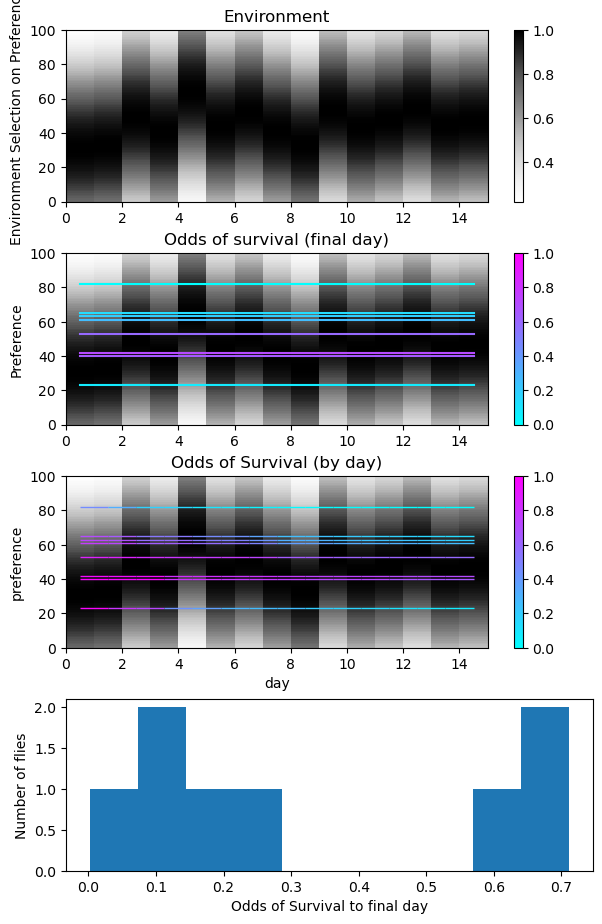

Mean survival rate:0.5323972319867739


In [65]:
[sims, survivalpercent, fig]=driftsim(envi, driftbounds=.2, dailydrift=.001, numberofbins=100, prefvariability=.2, prefmean=50, numsims=8)


In [64]:
fig.savefig('F2B_bhsim.pdf')

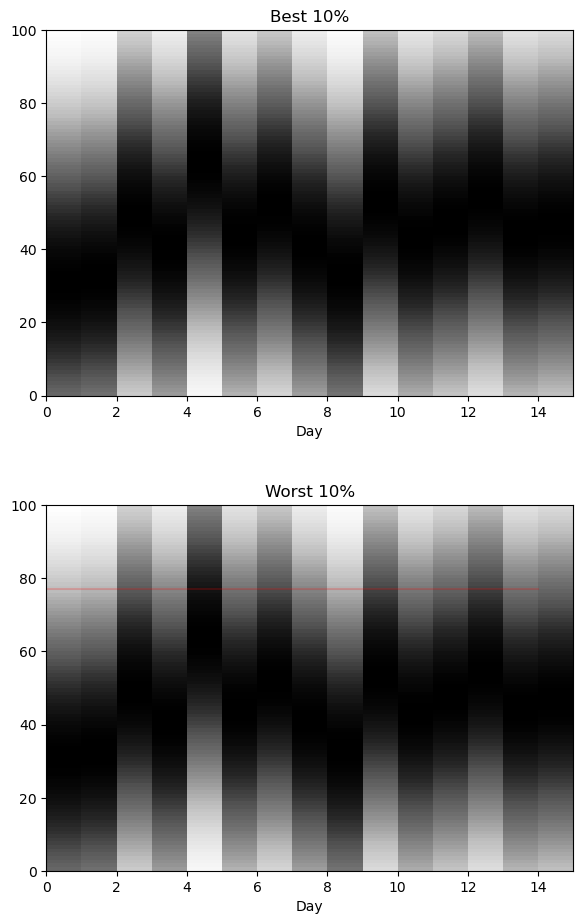

In [27]:
# print(survivalpercent.shape)
numsims=int(survivalpercent.shape[0])

percentile=np.sort(survivalpercent[:,-1])[int(.9*numsims)]
top10=np.where(survivalpercent[:,-1]>percentile)
# print(top10)
# survivalpercentile=np.where
# plt.plot(sorted)
# top10
toptraces=np.squeeze(sims[top10,:])
# print(x)

fig, (ax0, ax1) = plt.subplots(2, 1)
fig.set_figwidth(6)
fig.set_figheight(9)
fig.tight_layout()
plt.subplots_adjust(hspace=.3)

ax0.pcolormesh(envi, cmap='Greys')
ax0.plot(np.transpose(toptraces), 'g',alpha=.2)
ax0.set_xlabel('Day')
ax0.set_title('Best 10%')
# plt.show()

percentile=np.sort(survivalpercent[:,-1])[int(.1*numsims)]
bottom10=np.where(survivalpercent[:,-1]<percentile)
bottomtraces=np.squeeze(sims[bottom10,:])
# survivalpercentile=np.where
# plt.plot(sorted)
# top10
# x=np.squeeze(sims[top10,:])
ax1.pcolormesh(envi, cmap='Greys')
ax1.plot(np.transpose(bottomtraces), 'r', alpha=.2)
ax1.set_xlabel('Day')
ax1.set_title('Worst 10%')
plt.show()

# plt.plot(survivalpercent)

0.7461922688750674
Mean survival rate:0.355894250079262


/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_32729/2043066252.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmp=cm.get_cmap('cool')


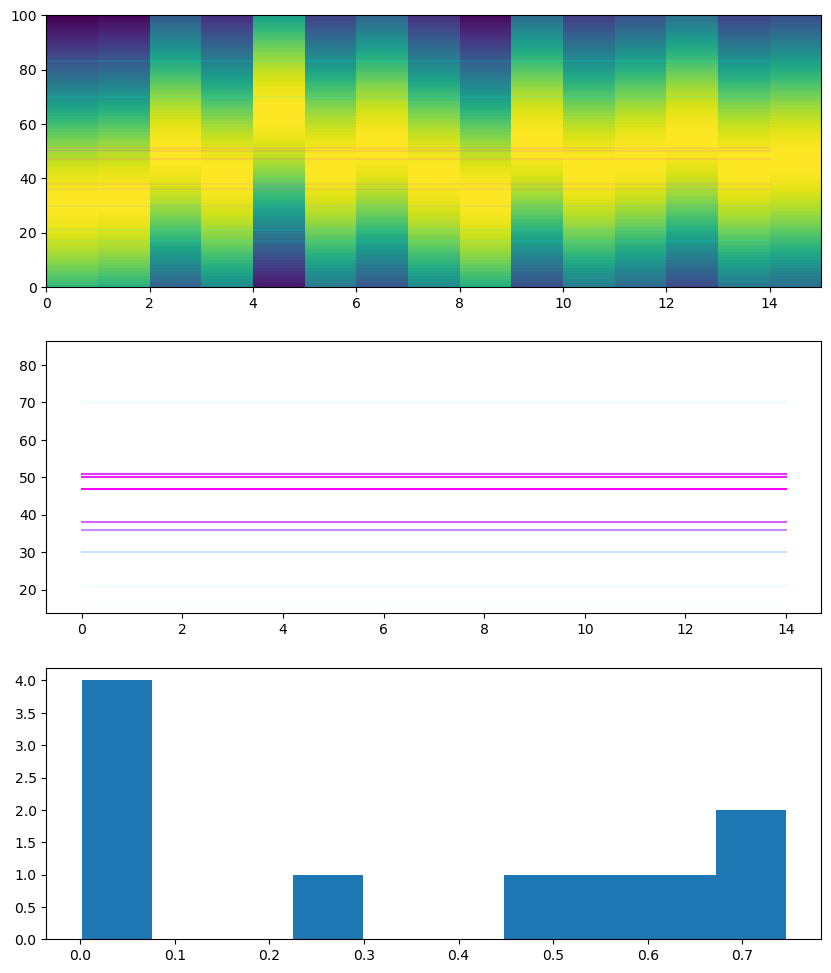

In [28]:

# plt.pcolormesh(envi)
# envi[:,11]

driftbounds=.2
dailydrift=.001
numberofbins=100
x=np.linspace(-1,1,numberofbins)
numbins=100
prefvariability=.2
prefmean=50


blur=np.zeros((numberofbins,numberofbins)) # [which bin profile it's for, what the distribution is between that bin and all other bins, 2]
blur2=np.zeros((numberofbins,numberofbins)) # [which bin profile it's for, what the distribution is between that bin and all other bins, 2]

if dailydrift==0:
    for b in range(numberofbins):
        blur2[b,b]=1
    
else:
    for b in range(numberofbins):
        blur[b,:]=sci.norm.pdf(x,x[b],dailydrift)
        blur[b,:]/=np.sum(blur[b,:])
        blur2[b,:]=blur[b,:]*sci.norm.pdf(x,0,driftbounds)
        blur2[b,:]/=np.sum(blur2[b,:])

#     for i in range(0,4):
#         plt.plot(blur[i*25,:], 'g')
#         plt.plot(blur2[i*25,:])
#         plt.show()



# startpref=int(np.round(np.random.normal(prefmean,prefvariability*numbins)))
startpref=int(np.round(np.minimum(0, np.maximum(100, np.random.normal(prefmean,prefvariability*numbins)))))
# print(startpref)

allsims=np.zeros([numsims,numdays])
survivalpercent=np.ones(numsims)
# print(survivalpercent)
for n in range(numsims):
    allsims[n,0]=int(np.minimum(99, np.maximum(0, np.round(np.random.normal(prefmean,prefvariability*numbins)))))
#     print(allsims[n,0])
    for t in range(1,numdays):
#         print(n,t)
        allsims[n,t]=randomnewbin(blur2, int(allsims[n,t-1]))
#         print(n,t)
#         print(n,t, allsims[n,t])
        survivalpercent[n]*=envi[int(allsims[n,t]),t]
# survivalpercent=-np.log(survivalpercent)
survivalmax=np.max(survivalpercent)
print(survivalmax)
    
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

fig.set_figwidth(10)
fig.set_figheight(12)
ax1.pcolormesh(envi)

for n in range(numsims):
    cmp=cm.get_cmap('cool')
    ax1.plot(allsims[n,:], color=cmp(survivalpercent[n]/survivalmax), alpha=.1)
    ax2.plot(allsims[n,:], color=cmp(survivalpercent[n]/survivalmax), alpha=survivalpercent[n]/survivalmax)


    
ax3.hist(survivalpercent)
print('Mean survival rate:'+str(np.mean(survivalpercent)))

# allsims
# fig.colorbar(cmp, ax=ax)

In [29]:

colormapused=cm.get_cmap('winter')
colormapused(.3)

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_32729/13113129.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormapused=cm.get_cmap('winter')


(0.0, 0.2980392156862745, 0.8509803921568627, 1.0)

In [30]:
index='R'+str(1)+'_Env_FinalPopulations.npy'
print(index)

R1_Env_FinalPopulations.npy
